In [29]:
import pandas as pd
import numpy as np
import re
import datetime
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import math

In [30]:
filename='./Data/train_prepro.csv'
df = pd.read_csv(filename)

## Using Original Features

In [31]:
# normalize playtime by log10
playtime = df.playtime_forever
max_pt = max(playtime)
norm_pt = np.log10(playtime) / np.log10(max(playtime))

#print (df[0:6])

In [32]:
# purchase_date - release_date interval

pur_rel_itv = df.pur_rel_itv
max_pri = max(pur_rel_itv)
norm_pri = np.log10(pur_rel_itv) / np.log10(max_pri)

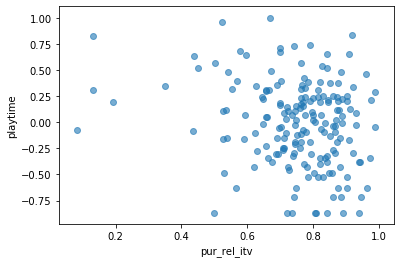

In [49]:
x = norm_pri
y = norm_pt
plt.scatter(x, y, alpha=0.6)
plt.xlabel('pur_rel_itv')
plt.ylabel('playtime')
plt.show()

In [33]:
# price

price = df.price
max_price = max(price)
norm_price = np.log10(price) / np.log10(max_price)

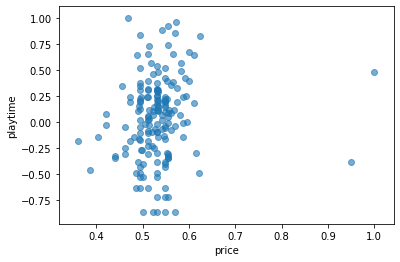

In [16]:
x = norm_price
y = norm_pt
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price')
plt.ylabel('playtime')
plt.show()

In [34]:
# positive reviews

positive_review = df.total_positive_reviews.values
max_pr = max(positive_review)
norm_pr = np.log10(positive_review) / np.log10(max_pr)

C:\Users\Octavia\.conda\envs\MSBD5001\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


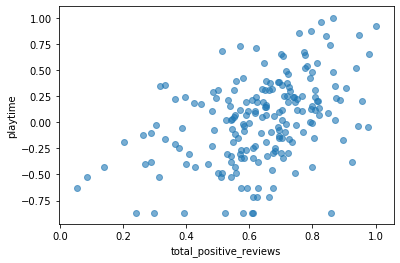

In [53]:
x = norm_pr
y = norm_pt
plt.scatter(x, y, alpha=0.6)
plt.xlabel('total_positive_reviews')
plt.ylabel('playtime')
plt.show()

In [35]:
# negative reviews

negative_review = df.total_negative_reviews
max_nr = max(negative_review)
norm_nr = np.log10(negative_review) / np.log10(max_nr)

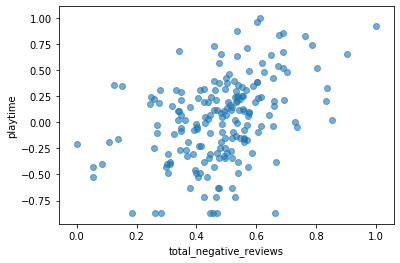

In [55]:
x = norm_nr
y = norm_pt
plt.scatter(x, y, alpha=0.6)
plt.xlabel('total_negative_reviews')
plt.ylabel('playtime')
plt.show()

## Using Ensemble Features

In [36]:
norm_pt = norm_pt.tolist()

In [37]:
for npt in norm_pt:
    if math.isinf(npt):
        norm_pt[norm_pt.index(npt)] = -100# a = df[(df.BoolCol==3)&(df.attr==22)].index.tolist()
#norm_pt[0:5]

In [38]:
norm_price = norm_price.tolist()
norm_pr = norm_pr.tolist()
norm_nr = norm_nr.tolist()
norm_pri = norm_pri.tolist()

In [39]:
# handling -inf
for npr in norm_price:
    if math.isinf(npr):
        norm_price[norm_price.index(npr)] = -100

for npr in norm_pr:
    if math.isinf(npr):
        norm_pr[norm_pr.index(npr)] = -100
        
for nnr in norm_nr:
    if math.isinf(nnr):
        norm_nr[norm_nr.index(nnr)] = -100
        
for npri in norm_pri:
    if math.isinf(npri):
        norm_pri[norm_pri.index(npri)] = -100


In [40]:
data_norm = {'id':df.id,
            'playtime_forever': norm_pt,
            'price': norm_price,
            'total_positive_reviews': norm_pr,
            'total_negative_reviews': norm_nr,
            'pur_rel_itv': norm_pri,
            'genres_vec': df.genres_vec}
df_norm = pd.DataFrame(data_norm)
df_norm.head()

,id,playtime_forever,price,total_positive_reviews,total_negative_reviews,pur_rel_itv,genres_vec
0,0,-100.000000,0.495300,0.455419,0.351496,0.886103,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,1,-0.864800,-100.000000,0.241255,-100.000000,0.735512,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,2,-100.000000,0.513452,0.616497,0.500310,0.882535,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,3,0.090284,0.554632,0.850387,0.574878,0.931464,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,4,0.656060,0.510991,0.699196,0.482044,0.910544,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [41]:
df_norm.to_csv("train_norm.csv",sep=',')

In [48]:
filename='./Data/train_norm.csv'
dfn = pd.read_csv(filename)

In [54]:
# get rid of useless data
dfn = dfn[dfn['playtime_forever'] != -100]
dfn

,Unnamed: 0,id,playtime_forever,price,total_positive_reviews,total_negative_reviews,pur_rel_itv,genres_vec
1,1,1,-0.864800,-100.000000,0.241255,-100.000000,0.735512,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,3,3,0.090284,0.554632,0.850387,0.574878,0.931464,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,4,4,0.656060,0.510991,0.699196,0.482044,0.910544,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
5,5,6,0.203171,0.493649,0.814908,0.534608,0.904487,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
6,6,7,-0.400706,-100.000000,0.269033,0.084603,0.772073,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
343,343,345,0.877770,0.541786,0.795882,0.537671,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
345,345,347,0.668011,0.599388,0.773884,0.688961,0.698760,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
347,347,349,-0.232047,0.510991,0.618136,0.408784,0.658151,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
348,348,350,0.189270,0.495300,0.722201,0.596201,0.847079,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [50]:
dfn.to_csv("train_norm_playtime_gt_0.csv",sep=',')

In [51]:
playtime = dfn.playtime_forever
price = dfn.price
pr = dfn.total_positive_reviews
nr = dfn.total_negative_reviews
pri = dfn.pur_rel_itv


In [52]:
# two components
pricePluspr = price + pr
priceTimepr = price * pr * 100
pricePluspri = price + pri
priceTimepri = price * pri * 100

print (pricePluspr)

1     -99.758745
3       1.405020
4       1.210187
5       1.308557
6     -99.730967
         ...    
343     1.337668
345     1.373272
347     1.129128
348     1.217501
350     0.933067
Length: 197, dtype: float64


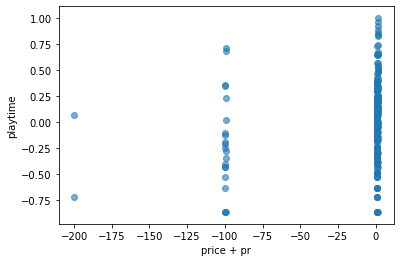

In [53]:
x = pricePluspr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price + pr')
plt.ylabel('playtime')
plt.show()

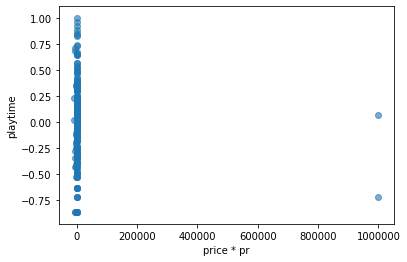

In [47]:
x = priceTimepr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price * pr')
plt.ylabel('playtime')
plt.show()

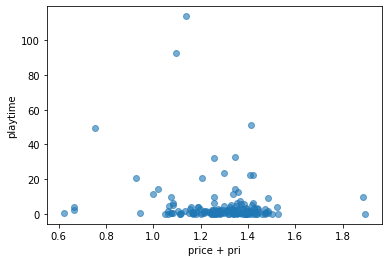

In [106]:
x = pricePluspri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price + pri')
plt.ylabel('playtime')
plt.show()

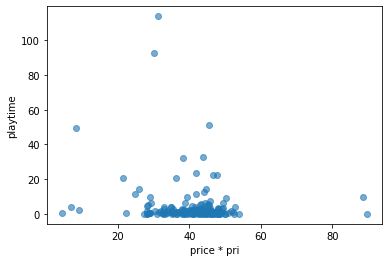

In [107]:
x = priceTimepri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price * pri')
plt.ylabel('playtime')
plt.show()

In [110]:
# two components
prPluspri = pr + pri
prTimepri = pr * pri * 100

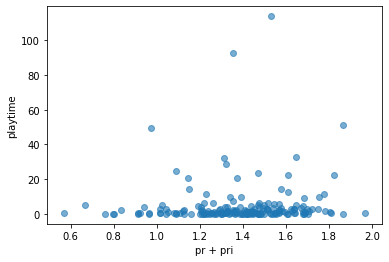

In [111]:
x = prPluspri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('pr + pri')
plt.ylabel('playtime')
plt.show()

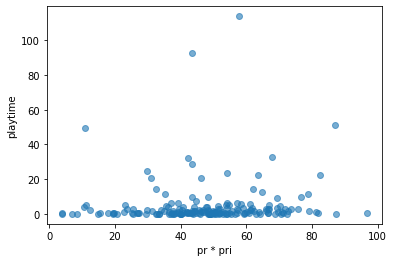

In [113]:
x = prTimepri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('pr * pri')
plt.ylabel('playtime')
plt.show()

In [114]:
# two components
pricePlusnr = price + nr
priceTimenr = price * nr * 100

prPlusnr = pr + nr
prTimenr = pr * nr * 100

priPlusnr = pri + nr
priTimenr = pri * nr * 100

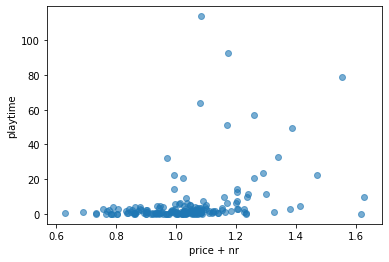

In [115]:
x = pricePlusnr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price + nr')
plt.ylabel('playtime')
plt.show()

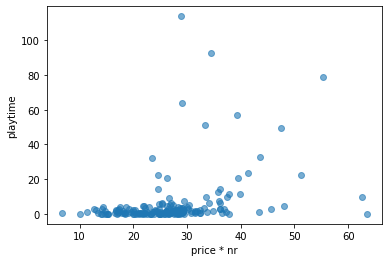

In [116]:
x = priceTimenr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price * nr')
plt.ylabel('playtime')
plt.show()

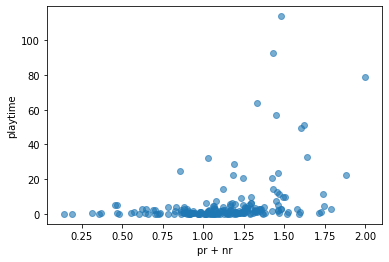

In [118]:
x = prPlusnr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('pr + nr')
plt.ylabel('playtime')
plt.show()

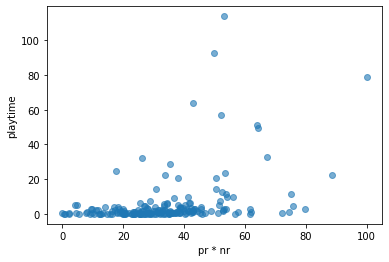

In [119]:
x = prTimenr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('pr * nr')
plt.ylabel('playtime')
plt.show()

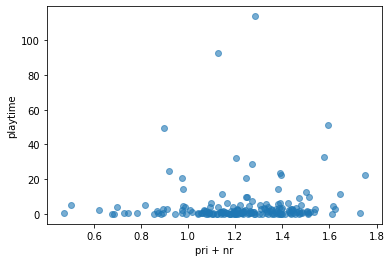

In [120]:
x = priPlusnr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('pri + nr')
plt.ylabel('playtime')
plt.show()

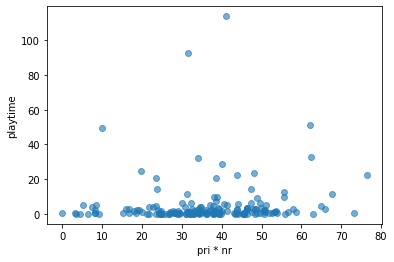

In [121]:
x = priTimenr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('pri * nr')
plt.ylabel('playtime')
plt.show()

In [122]:
# using three components(+)
pricePprPpri = price + pr + pri
pricePnrPpr = price + nr + pr
pricePnrPpri = price + nr + pri
prPnrPpri = pr + nr + pri

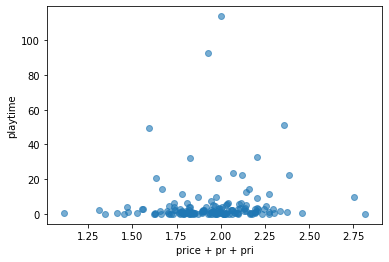

In [123]:
x = pricePprPpri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price + pr + pri')
plt.ylabel('playtime')
plt.show()

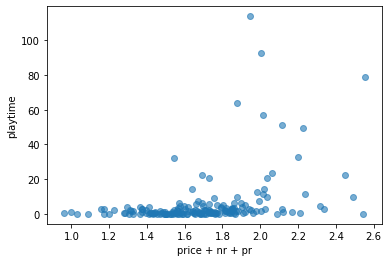

In [124]:
x = pricePnrPpr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price + nr + pr')
plt.ylabel('playtime')
plt.show()

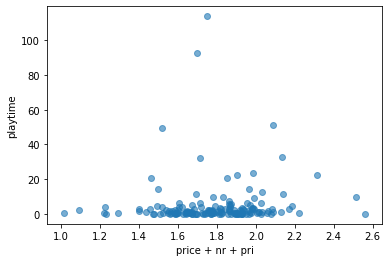

In [125]:
x = pricePnrPpri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price + nr + pri')
plt.ylabel('playtime')
plt.show()

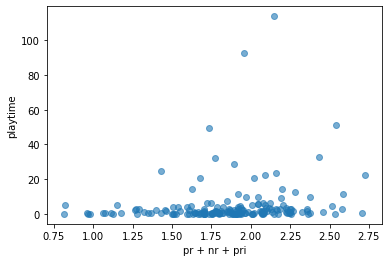

In [126]:
x = prPnrPpri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('pr + nr + pri')
plt.ylabel('playtime')
plt.show()

In [128]:
# using three components(*)
priceTprTpri = price * pr * pri * 1000
priceTnrTpr = price * nr * pr * 1000
priceTnrTpri = price * nr * pri * 1000
prTnrTpri = pr * nr * pri * 1000

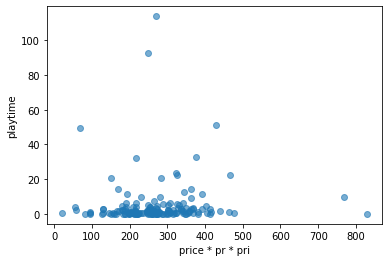

In [129]:
x = priceTprTpri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price * pr * pri')
plt.ylabel('playtime')
plt.show()

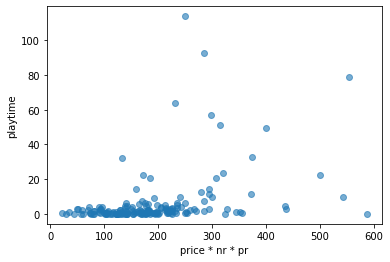

In [130]:
x = priceTnrTpr
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price * nr * pr')
plt.ylabel('playtime')
plt.show()

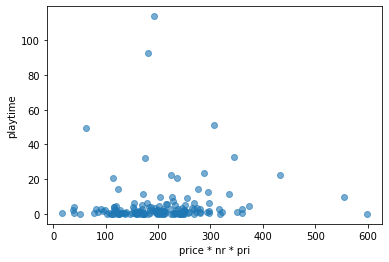

In [131]:
x = priceTnrTpri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price * nr * pri')
plt.ylabel('playtime')
plt.show()

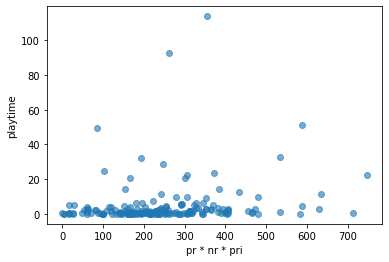

In [132]:
x = prTnrTpri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('pr * nr * pri')
plt.ylabel('playtime')
plt.show()

In [133]:
# using four components
pricePprPnrPpri = price + pr + nr + pri
priceTprTnrTpri = price * pr * nr * pri * 1000

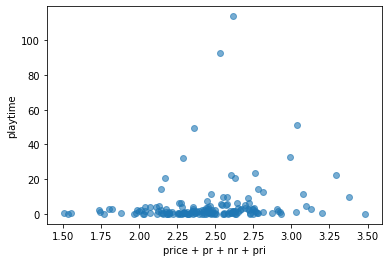

In [134]:
x = pricePprPnrPpri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price + pr + nr + pri')
plt.ylabel('playtime')
plt.show()

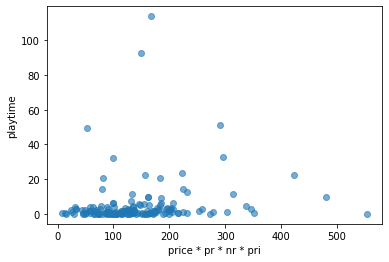

In [135]:
x = priceTprTnrTpri
y = playtime
plt.scatter(x, y, alpha=0.6)
plt.xlabel('price * pr * nr * pri')
plt.ylabel('playtime')
plt.show()

In [6]:
np.log10(0)

C:\Users\Octavia\.conda\envs\MSBD5001\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf